In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import math

In [2]:
def convert_ip(ip):
    ip = ip.strip().split('.')
    convert = []
    total = 0.0
    for each in ip:
        a = int(each)
        convert.append(a)
    for i in range(len(convert)):
        total += convert[i]*pow(64, len(convert)-i)
    return total

In [3]:
def convert_timestamp(x):
    date = ''
    saat = ''
    x = x.strip().split(' ')
    date = x[0].replace('/', '')
    
    if x[2] == "PM":
        hours = x[1].split(":")
        hours[0] = str(int(hours[0])+12)
        saat = "".join(hours)
    else:
        hours = x[1].split(":")
        saat = "".join(hours)
    return date +  saat


In [4]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [5]:
x = '25/07/2019 03:25:53 AM'
print(convert_timestamp(x))

25072019032553


In [6]:
data = pd.read_csv("IoT Network Intrusion Dataset.csv")

In [7]:
Src_IP = np.array(data['Src_IP'])
Dst_IP = np.array(data['Dst_IP'])
src = []
for each in Src_IP:
    src.append(convert_ip(each))
dst = []
for each in Dst_IP:
    dst.append(convert_ip(each))
    
stamps = []
for each in data['Timestamp']:
    stamps.append(convert_timestamp(each))



In [8]:
x_data = data.drop(['Label','Flow_ID', 'Src_IP','Timestamp', 'Dst_IP', 'Cat', 'Sub_Cat'], axis=1)


In [9]:
data['Label'].value_counts()

Anomaly    585710
Normal      40073
Name: Label, dtype: int64

In [10]:
label = [0 if each == "Normal" else 1 for each in data.Label]

In [11]:
df = pd.DataFrame({'src_ip':src,
                   'dst_ip': dst,
                   'time': stamps,
                   'Label':label})
df.head()

,src_ip,dst_ip,time,Label
0,3.265266e+09,3.265267e+09,25072019032553,1
1,3.767227e+09,3.265266e+09,26052019221106,1
2,3.265267e+09,3.265266e+09,11072019012448,1
3,3.265267e+09,3.265266e+09,04092019035817,1
4,3.265266e+09,4.077662e+09,10092019014118,1


In [12]:
x_timed = pd.concat([x_data, df], axis=1)

In [13]:
x_timed.head()

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,src_ip,dst_ip,time,Label
0,10000,10101,17,75,1,1,982.0,1430.0,982.0,982.0,...,0.0,0.0,75.0,0.000000,75.0,75.0,3.265266e+09,3.265267e+09,25072019032553,1
1,2179,554,6,5310,1,2,0.0,0.0,0.0,0.0,...,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,3.767227e+09,3.265266e+09,26052019221106,1
2,52727,9020,6,141,0,3,0.0,2806.0,0.0,0.0,...,0.0,0.0,70.5,0.707107,71.0,70.0,3.265267e+09,3.265266e+09,11072019012448,1
3,52964,9020,6,151,0,2,0.0,2776.0,0.0,0.0,...,0.0,0.0,151.0,0.000000,151.0,151.0,3.265267e+09,3.265266e+09,04092019035817,1
4,36763,1900,17,153,2,1,886.0,420.0,452.0,434.0,...,0.0,0.0,76.5,0.707107,77.0,76.0,3.265266e+09,4.077662e+09,10092019014118,1


In [14]:
 x_timed['time']= pd.to_datetime(x_timed['time'], format="%d%m%Y%H%M%S")

In [15]:
x_timed.head()

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,src_ip,dst_ip,time,Label
0,10000,10101,17,75,1,1,982.0,1430.0,982.0,982.0,...,0.0,0.0,75.0,0.000000,75.0,75.0,3.265266e+09,3.265267e+09,2019-07-25 03:25:53,1
1,2179,554,6,5310,1,2,0.0,0.0,0.0,0.0,...,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,3.767227e+09,3.265266e+09,2019-05-26 22:11:06,1
2,52727,9020,6,141,0,3,0.0,2806.0,0.0,0.0,...,0.0,0.0,70.5,0.707107,71.0,70.0,3.265267e+09,3.265266e+09,2019-07-11 01:24:48,1
3,52964,9020,6,151,0,2,0.0,2776.0,0.0,0.0,...,0.0,0.0,151.0,0.000000,151.0,151.0,3.265267e+09,3.265266e+09,2019-09-04 03:58:17,1
4,36763,1900,17,153,2,1,886.0,420.0,452.0,434.0,...,0.0,0.0,76.5,0.707107,77.0,76.0,3.265266e+09,4.077662e+09,2019-09-10 01:41:18,1


In [16]:
sorted_data = x_timed.sort_values(by='time')


In [17]:
sorted_data.head()

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,src_ip,dst_ip,time,Label
15553,9020,49784,6,263,2,1,2776.0,1388.0,1388.0,1388.0,...,0.0,0.0,131.5,12.020815,140.0,123.0,3.265266e+09,3.265267e+09,2019-05-20 04:56:14,0
324057,9020,49784,6,356,0,2,0.0,0.0,0.0,0.0,...,0.0,0.0,356.0,0.000000,356.0,356.0,3.265266e+09,3.265267e+09,2019-05-20 04:56:14,0
115855,9020,49784,6,396,0,2,0.0,0.0,0.0,0.0,...,0.0,0.0,396.0,0.000000,396.0,396.0,3.265266e+09,3.265267e+09,2019-05-20 04:56:14,0
23591,9020,49784,6,156,0,3,0.0,0.0,0.0,0.0,...,0.0,0.0,78.0,2.828427,80.0,76.0,3.265266e+09,3.265267e+09,2019-05-20 04:56:14,0
306958,9020,49784,6,321,3,1,2806.0,1388.0,1388.0,30.0,...,0.0,0.0,107.0,27.495454,131.0,77.0,3.265266e+09,3.265267e+09,2019-05-20 04:56:14,0


In [18]:
sorted_data = sorted_data.reset_index()

In [19]:
dataset = sorted_data.drop(['time', 'index'], axis=1).iloc[:,:82].values

In [20]:

x1=dataset[:round(len(dataset)*0.0375),:]
x2 = dataset[round(len(dataset)*0.0750):round(len(dataset)*0.6),:]
y1 = dataset[round(len(dataset)*0.0375):round(len(dataset)*0.0750),:]
y2=dataset[round(len(dataset)*0.6):,:]
unique, counts = np.unique(x1, return_counts=True)

print(np.asarray((unique, counts)).T)
unique, counts = np.unique(x2, return_counts=True)

print(np.asarray((unique, counts)).T)

[[-1.00000000e+00  2.35490000e+04]
 [ 0.00000000e+00  9.78572000e+05]
 [ 3.33333333e-01  1.00000000e+00]
 ...
 [ 3.75809645e+09  9.00000000e+00]
 [ 3.75811245e+09  2.60000000e+01]
 [ 4.07766182e+09  2.80000000e+01]]
[[-1.00000000e+00  4.77627000e+05]
 [ 0.00000000e+00  1.41310330e+07]
 [ 1.42857143e-01  2.00000000e+00]
 ...
 [ 3.83334138e+09  1.00000000e+00]
 [ 4.07766182e+09  1.21100000e+03]
 [            inf  5.00000000e+02]]


In [21]:
x1.shape


(23467, 82)

In [22]:
x2.shape

(328536, 82)

In [23]:
x = np.concatenate((x1, x2), axis=0)
x.shape

(352003, 82)

In [24]:
unique, counts = np.unique(y1[:,-1], return_counts=True)

print(np.asarray((unique, counts)).T)
unique, counts = np.unique(y2[:,-1], return_counts=True)

print(np.asarray((unique, counts)).T)

[[0.0000e+00 1.6606e+04]
 [1.0000e+00 6.8610e+03]]
[[1.00000e+00 2.50313e+05]]


In [25]:
y1.shape

(23467, 82)

In [26]:
y2.shape

(250313, 82)

In [27]:
y = np.concatenate((y1, y2), axis=0)
y.shape

(273780, 82)

In [28]:
dataset[np.isinf(dataset)] = 0

(414580, 1, 163) (414580,) (211202, 1, 163) (211202,)
Epoch 1/100
12956/12956 - 62s - loss: 0.0168 - val_loss: 0.0788 - 62s/epoch - 5ms/step
Epoch 2/100
12956/12956 - 57s - loss: 0.0082 - val_loss: 0.0787 - 57s/epoch - 4ms/step
Epoch 3/100
12956/12956 - 56s - loss: 0.0104 - val_loss: 0.0786 - 56s/epoch - 4ms/step
Epoch 4/100
12956/12956 - 59s - loss: 0.0055 - val_loss: 0.0788 - 59s/epoch - 5ms/step
Epoch 5/100
12956/12956 - 58s - loss: 0.0049 - val_loss: 0.0786 - 58s/epoch - 4ms/step
Epoch 6/100
12956/12956 - 54s - loss: 0.0039 - val_loss: 0.0496 - 54s/epoch - 4ms/step
Epoch 7/100
12956/12956 - 54s - loss: 0.0035 - val_loss: 0.0599 - 54s/epoch - 4ms/step
Epoch 8/100
12956/12956 - 54s - loss: 0.0035 - val_loss: 0.0370 - 54s/epoch - 4ms/step
Epoch 9/100
12956/12956 - 54s - loss: 0.0035 - val_loss: 0.0129 - 54s/epoch - 4ms/step
Epoch 10/100
12956/12956 - 55s - loss: 0.0035 - val_loss: 0.0069 - 55s/epoch - 4ms/step
Epoch 11/100
12956/12956 - 54s - loss: 0.0034 - val_loss: 0.0567 - 54s/epoc

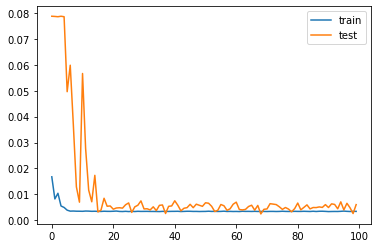

6601/6601 [==============================] - 10s 1ms/step


In [31]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(dataset)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

 
# split into train and test sets
values = reframed.values

x1 = values[:round(len(values)*0.0375),:]
x2 = values[round(len(values)*0.0750):round(len(values)*0.7),:]


y1 = values[round(len(values)*0.0375):round(len(values)*0.0750),:]
y2 = values[round(len(values)*0.7):,:]

train =np.concatenate((x1, x2), axis=0)
test = np.concatenate((y1, y2), axis=0)
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
 
# design network
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=32, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
 
# make a prediction
pred_lstm = model.predict(test_X)


In [ ]:
test_y.shape

In [32]:
pred_lstm = np.where(pred_lstm > 0.5, 1, 0)

In [33]:
pred_lstm = pred_lstm.flatten()

In [34]:
pred_lstm

array([0, 0, 0, ..., 1, 1, 1])

In [35]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(test_y, pred_lstm))
print(classification_report(test_y, pred_lstm))

[[ 16605      0]
 [     1 194596]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     16605
         1.0       1.00      1.00      1.00    194597

    accuracy                           1.00    211202
   macro avg       1.00      1.00      1.00    211202
weighted avg       1.00      1.00      1.00    211202



<AxesSubplot:>

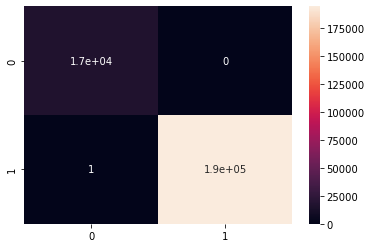

In [36]:
import seaborn as sns
sns.heatmap(confusion_matrix(test_y, pred_lstm), annot=True)